In [12]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [13]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_7_descriptive = get_prompt("descriptive", 7)
prompt_7_natural = get_prompt("natural", 7)

prompt_7_descriptive, prompt_7_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute the RMSD, SASA, and radius of gyration of the simulation.')

In [14]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_7_descriptive)

Thought: To complete all the tasks, I'll need to use multiple tools in sequence. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's move on to the next task, which is to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_225127",
        "top_file": "1LYZ_225127",
        "target_frames": "first"
    }
}
```Thought: We've successfully obtained the secondary structure assignments for 1LYZ. Now, let's move on to the next task, which is to find any known binding or active sites. For this, we'll need to use the UniProt database, so first we need to get the UniProt ID for 1LYZ.

Action:
```
{
    "action": "MapProteinRepresentation",
    "action_input": {
        "query": "1LYZ",
     

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_225127: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_225127
 rec0_225130: dssp values for trajectory with id: 1LYZ_225127
 rec0_225200: dssp values for trajectory with id: 1LYZ_225127
 1LYZ_225321: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_225347: Initial positions for simulation sim0_225347
 sim0_225347: Basic Simulation of Protein 1LYZ_225321
 rec0_225348: Simulation trajectory for protein 1LYZ_225321 and simulation sim0_225347
 rec1_225348: Simulation state log for protein 1LYZ_225321 and simulation sim0_225347
 rec2_225348: Simulation pdb frames for protein 1LYZ_225321 and simulation sim0_225347
 rmsd_Lysozyme: RMSD for Lysozyme
 fig0_225629: RMSD plot for Lysozyme
 rgy_rec0_225348: Radii of gyration per frame for rec0_225348
 fig0_225651: Plot of radii of gyration over time for rec0_225348
 sasa_Lysozyme: Total SA

In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_225127"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_225127", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure the sites were found
from mdagent.tools.base_tools import GetAllKnownSites

get_all_known_sites = GetAllKnownSites()
get_all_known_sites._run(query="1LYZ", primary_accession="P00698")

"Active Sites: [{'start': 53, 'start_modifier': 'EXACT', 'end': 53, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}, {'start': 70, 'start_modifier': 'EXACT', 'end': 70, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nBinding Sites: [{'start': 119, 'start_modifier': 'EXACT', 'end': 119, 'end_modifier': 'EXACT', 'description': '', 'evidences': []}]\nNo other relevant sites."

In [6]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_225348")
top_path_1 = registry_1.get_mapped_path("top_sim0_225347")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

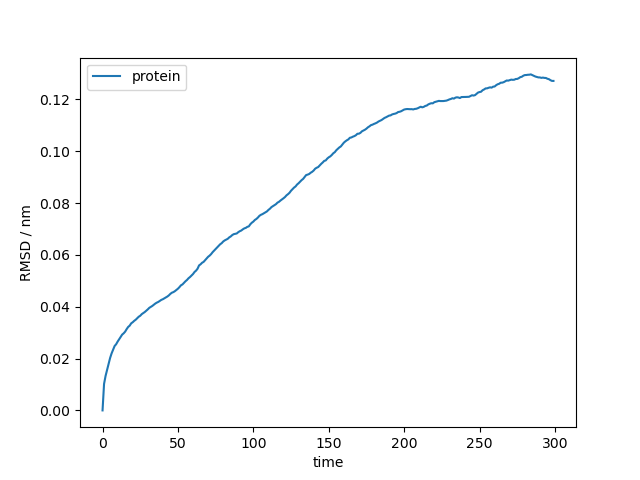

In [7]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_225629'))

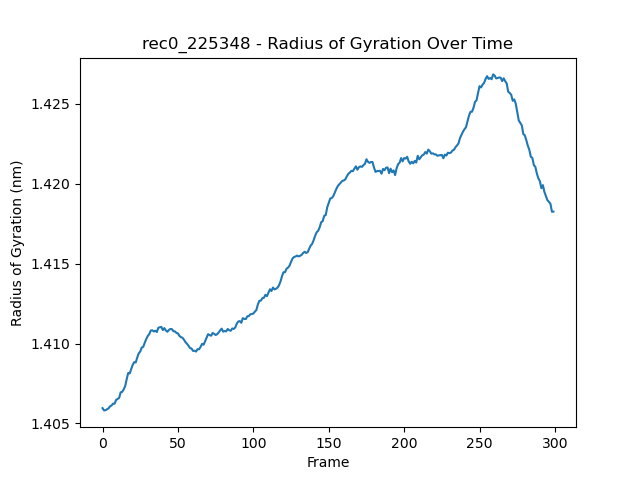

In [8]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_225651'))

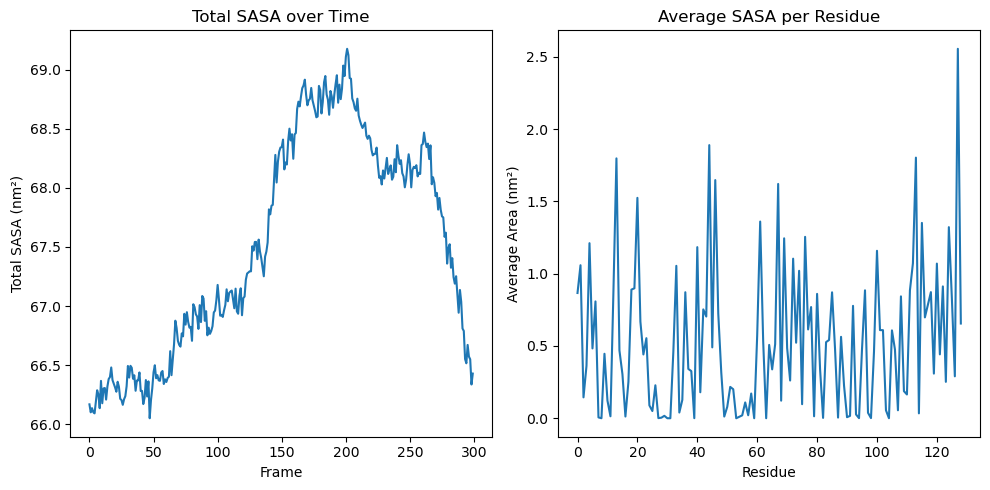

In [9]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_225836'))

In [15]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_7_natural)

Thought: To answer this question, we need to follow several steps. Let's start by downloading the PDB file for 1LYZ, then set up and run a simulation, analyze the secondary structure, find binding and active sites, and finally compute the requested metrics.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a short simulation for 1 picosecond at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_230336",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
            "constraintTolerance": 0.000001,
            "solvate": true
     

KeyError: 'Pressure'

In [16]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_230336: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_230336
 1LYZ_230347: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 


In [17]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_230336"))

In [20]:
# # make sure dssp was computed correctly
# from mdagent.tools.base_tools import ComputeDSSP

# dssp = ComputeDSSP(registry_2)
# dssp._run(traj_file= "1LYZ_230336", target_frames="first")

In [ ]:
# # make sure the sites were found
# from mdagent.tools.base_tools import GetAllKnownSites

# get_all_known_sites = GetAllKnownSites()
# get_all_known_sites._run(query="1LYZ", primary_accession="<P00698_or_other>")

In [ ]:
## make sure trajectory and topology exist
# traj_path_2 = registry_2.get_mapped_path("<traj_path>")
# top_path_2 = registry_2.get_mapped_path("<top_path>")

# assert os.path.exists(traj_path_2)
# assert os.path.exists(top_path_2)

In [ ]:
# # make sure rmsd plot was generated
# from IPython.display import Image
# Image(filename=registry_2.get_mapped_path('<rmsd_plot>'))

In [ ]:
# # make sure rgy plot was generated
# from IPython.display import Image
# Image(filename=registry_2.get_mapped_path('<rgy_plot>'))

In [ ]:
# # make sure sasa plot was generated
# from IPython.display import Image
# Image(filename=registry_2.get_mapped_path('<sasa_plot>'))